In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
World_cup = pd.read_csv("World_cup_2023.csv")

In [3]:
World_cup

,Team_name,Team_ranking,Titles,Win_percentage_ODI,WC_matches,WC_match_won,Win_percent_WC,WC_match_loss,Loss_percent_WC,Tied,No_result,World_cup_winner,Recent_points,Rating
0,Australia,1,5,60.73,94,69,73.40,23,24.46,1,1,Yes,2714,118
1,Pakistan,2,1,52.78,79,45,56.96,32,40.50,0,2,Yes,2316,116
2,India,3,2,52.38,84,53,63.09,29,34.52,1,1,Yes,3807,115
3,New Zealand,4,0,45.89,89,54,60.67,33,37.07,1,1,No,2806,104
4,England,5,1,50.32,83,48,57.83,32,38.55,2,1,Yes,2426,101
5,South Africa,6,0,61.00,64,38,59.37,23,35.93,2,1,No,1910,101
6,Bangladesh,7,0,36.65,40,14,35.00,25,62.50,0,1,No,2451,98
7,Afghanistan,8,0,49.65,15,1,6.66,14,93.33,0,0,No,1361,91
8,Sri Lanka,9,1,45.74,80,38,47.50,39,48.75,1,2,Yes,2794,87
9,Netherlands,10,0,34.21,20,2,10.00,18,90.00,0,0,No,1044,37


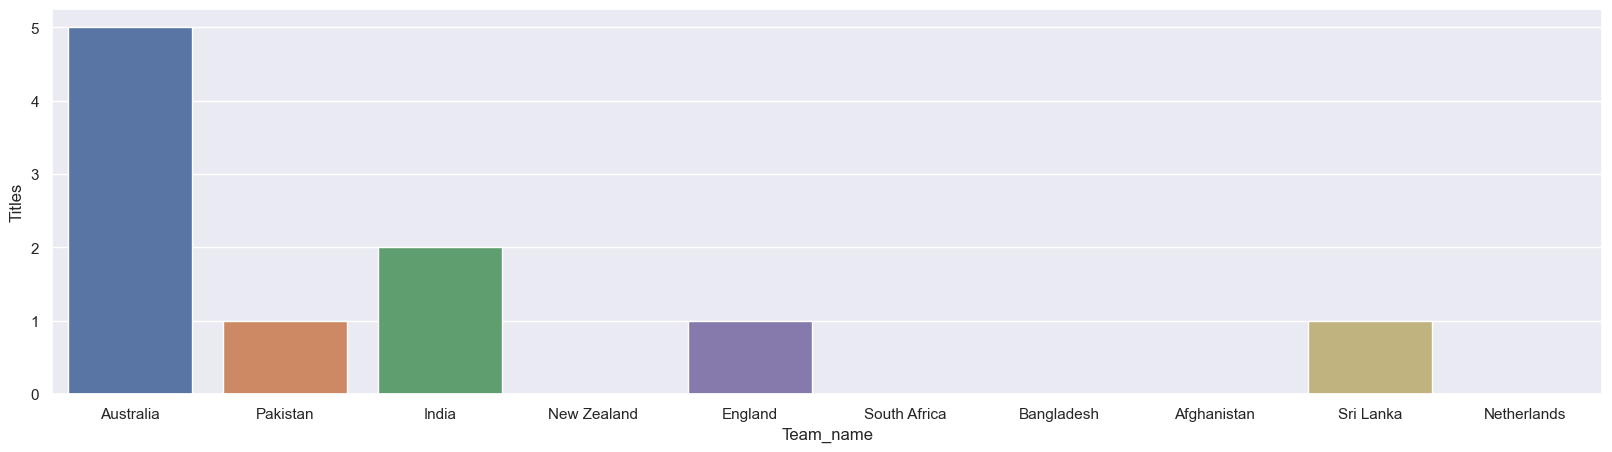

In [4]:
sns.set(rc={'figure.figsize':(20, 5)})

# Create a bar plot using sns.barplot to visualize team titles
sns.barplot(x='Team_name', y='Titles', data=World_cup)

# Display the plot
plt.show()

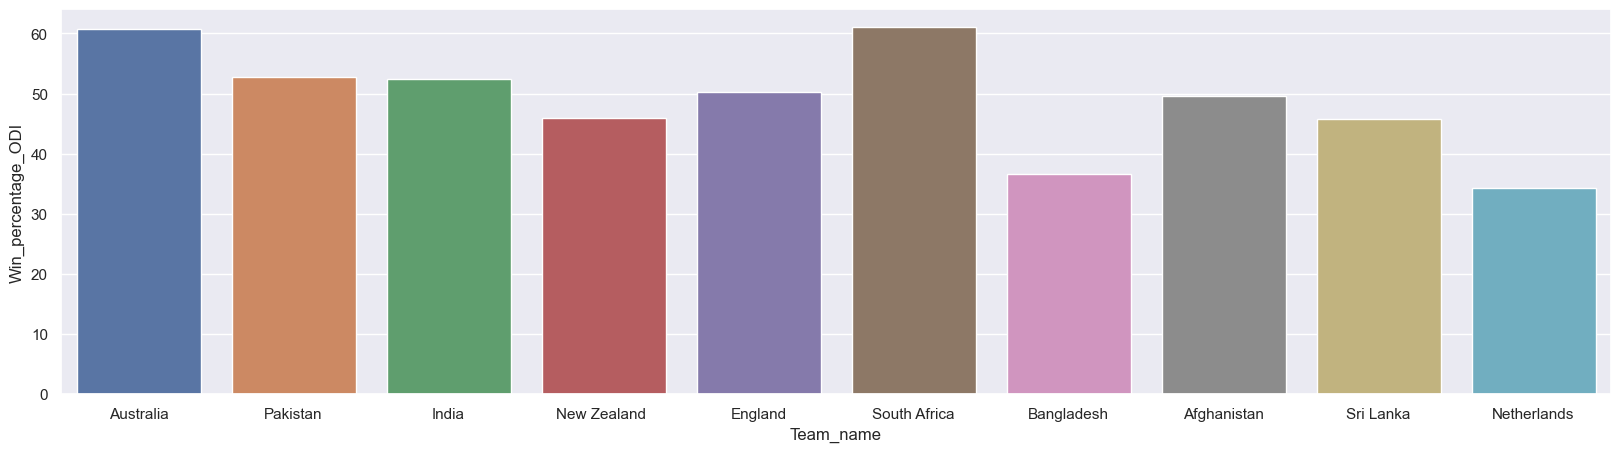

In [5]:
sns.set(rc={'figure.figsize':(20, 5)})

# Create a bar plot using Seaborn
sns.barplot(x='Team_name', y='Win_percentage_ODI', data=World_cup)

# Display the plot
plt.show()

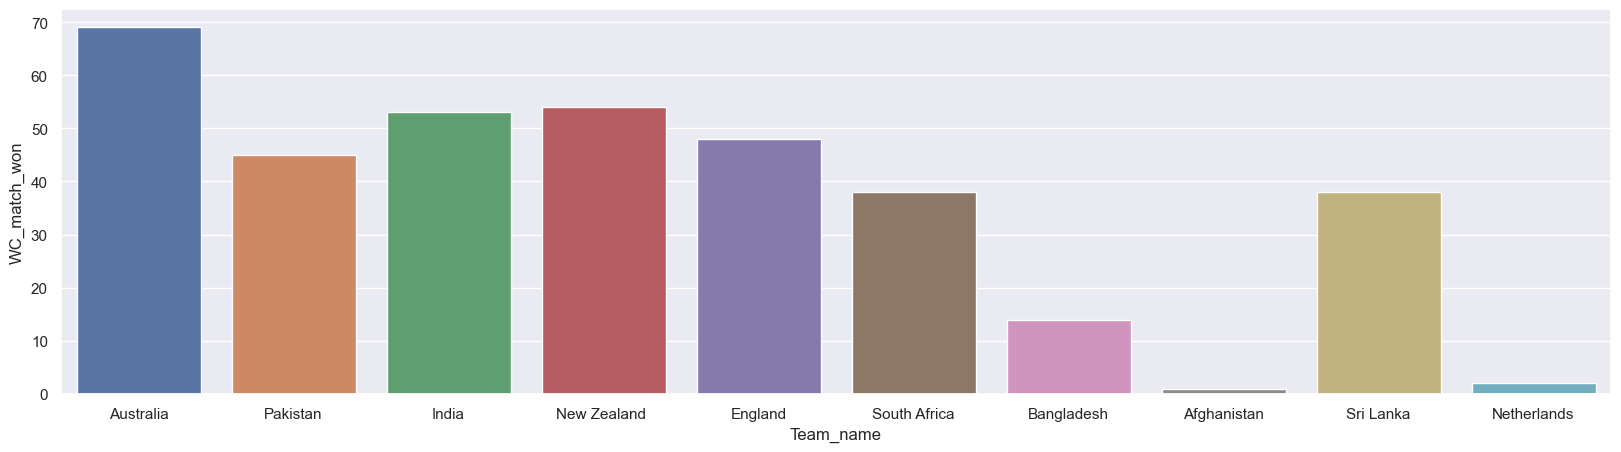

In [6]:
sns.set(rc={'figure.figsize':(20, 5)})

# Create a bar plot using Seaborn
sns.barplot(x='Team_name', y='WC_match_won', data=World_cup)

# Display the plot
plt.show()

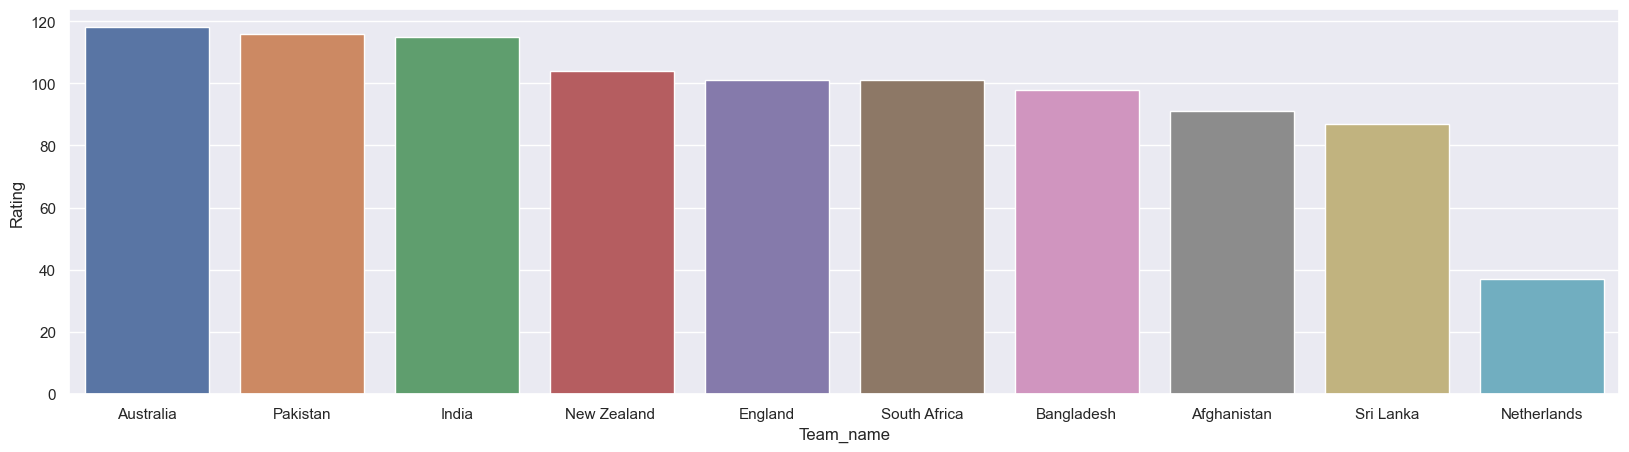

In [7]:
sns.set(rc={'figure.figsize':(20, 5)})

# Create a bar plot using Seaborn to display recent ratings of teams
sns.barplot(x='Team_name', y='Rating', data=World_cup)

# Display the plot
plt.show()

In [8]:
results = pd.read_csv("results.csv")
results.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
0,17/04/2015,Bangladesh,Pakistan,Bangladesh,won by 79 runs,Shere Bangla National Stadium
1,19/04/2015,Bangladesh,Pakistan,Bangladesh,won by 7 wickets,Shere Bangla National Stadium
2,22/04/2015,Bangladesh,Pakistan,Bangladesh,won by 8 wickets,Shere Bangla National Stadium
3,08/05/2015,Ireland,England,No result,No result,The Village
4,26/05/2015,Pakistan,Zimbabwe,Pakistan,won by 41 runs,Gaddafi Stadium


In [9]:
results.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
0,17/04/2015,Bangladesh,Pakistan,Bangladesh,won by 79 runs,Shere Bangla National Stadium
1,19/04/2015,Bangladesh,Pakistan,Bangladesh,won by 7 wickets,Shere Bangla National Stadium
2,22/04/2015,Bangladesh,Pakistan,Bangladesh,won by 8 wickets,Shere Bangla National Stadium
3,08/05/2015,Ireland,England,No result,No result,The Village
4,26/05/2015,Pakistan,Zimbabwe,Pakistan,won by 41 runs,Gaddafi Stadium


In [10]:
results.drop(results[(results['Winner'] == 'Match abandoned' )].index, inplace=True)
results.drop(results[(results['Winner'] == 'No result' )].index, inplace=True)

In [11]:
df = results[(results['Team_1'] == 'India') | (results['Team_2'] == 'India')]

# Create a new DataFrame 'India' containing all rows from the filtered DataFrame
India = df.iloc[:]

# Display the first few rows of the 'India' DataFrame
India.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
11,18/06/2015,Bangladesh,India,Bangladesh,won by 79 runs,Shere Bangla National Stadium
13,21/06/2015,Bangladesh,India,Bangladesh,won by 6 wickets,Shere Bangla National Stadium
14,24/06/2015,Bangladesh,India,India,won by 77 runs,Shere Bangla National Stadium
16,10/07/2015,Zimbabwe,India,India,won by 4 runs,Harare Sports Club
19,12/07/2015,Zimbabwe,India,India,won by 62 runs,Harare Sports Club


In [12]:
India_win = India[India['Winner']=='India']

In [13]:
excluded_value = 'India'

# Filtering out rows with the excluded value
filtered_df = India_win[India_win['Team_2'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_2'].value_counts()

# Print the value counts
print(value_counts)

Team_2
West Indies     6
New Zealand     4
Australia       3
Sri Lanka       3
England         2
South Africa    2
Name: count, dtype: int64


In [14]:
excluded_value = 'India'

# Filtering out rows with the excluded value
filtered_df = India_win[India_win['Team_1'] != excluded_value]

# Counting the occurrences of each value in the filtered DataFrame's 'Team_2' column.
value_counts = filtered_df['Team_1'].value_counts()

# Print the value counts
print(value_counts)

Team_1
Zimbabwe         5
South Africa     5
West Indies      5
Bangladesh       4
Zimbabwe         4
Australia        2
Sri Lanka        2
England          2
England          1
Hong Kong        1
New Zealand      1
Afghanistan      1
Australia        1
Bangladesh       1
Name: count, dtype: int64


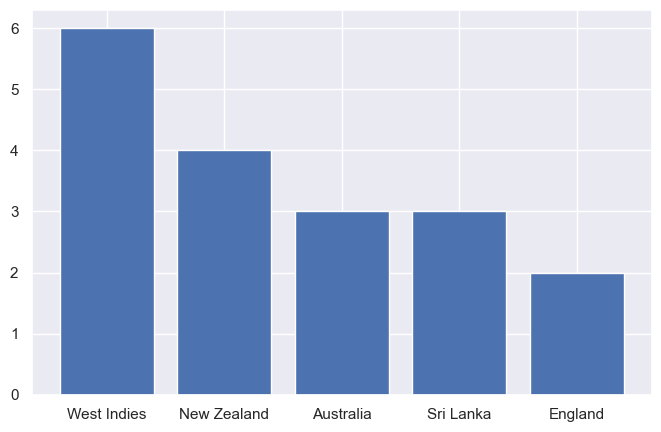

In [15]:
exclude = 'India'

# Filter out the opponent to exclude from the data
filtered_data = India_win[India_win['Team_2'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by India.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_2'].value_counts()[0:5].keys()), list(filtered_data['Team_2'].value_counts()[0:5]), color="b")
plt.show()

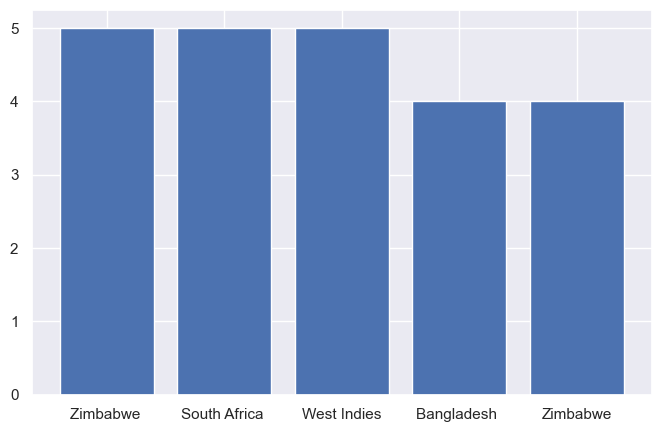

In [16]:
exclude = 'India'

# Filter out the opponent to exclude from the data
filtered_data = India_win[India_win['Team_1'] != exclude]

# Plotting a bar chart to show the top 5 opponents faced by India.
plt.figure(figsize=(8, 5))
plt.bar(list(filtered_data['Team_1'].value_counts()[0:5].keys()), list(filtered_data['Team_1'].value_counts()[0:5]), color="b")
plt.show()

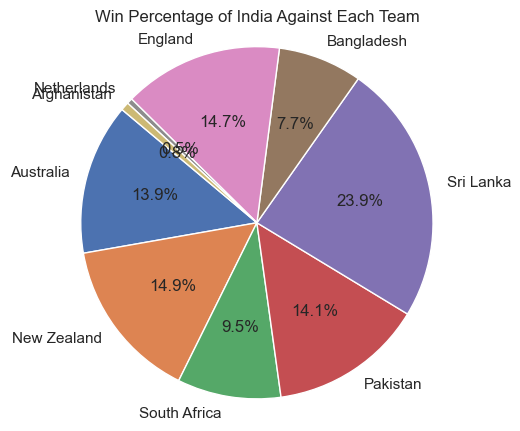

In [17]:
team_win_counts = {
    'Australia': 54,
    'New Zealand': 58,
    'South Africa ': 37,
    'Pakistan': 	55,
    'Sri Lanka': 93,
    'Bangladesh': 30,
    'England': 57,
    'Netherlands': 2,
    'Afghanistan': 3
}
total_matches = sum(team_win_counts.values())

# India's win percentages against each team is calculated
win_percentages = {team: (wins / total_matches) * 100 for team, wins in team_win_counts.items()}

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(win_percentages.values(), labels=win_percentages.keys(), autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Win Percentage of India Against Each Team')

# Display the pie chart
plt.show()
